## **Reg Logistica**

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generar datos de ejemplo
np.random.seed(0)
data = pd.DataFrame({
    'feature1': np.random.normal(size=100),
    'feature2': np.random.normal(size=100),
    'target': np.random.binomial(1, 0.5, size=100)
})

# Separar variables independientes y dependientes
X = data[['feature1', 'feature2']]
y = data['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crear el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Validación cruzada
cv_scores = cross_val_score(model, X, y, cv=5)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

Accuracy: 0.5333333333333333
Confusion Matrix:
[[12  7]
 [ 7  4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.63      0.63        19
           1       0.36      0.36      0.36        11

    accuracy                           0.53        30
   macro avg       0.50      0.50      0.50        30
weighted avg       0.53      0.53      0.53        30

Cross-Validation Scores: [0.6  0.45 0.5  0.55 0.5 ]
Mean Cross-Validation Score: 0.52


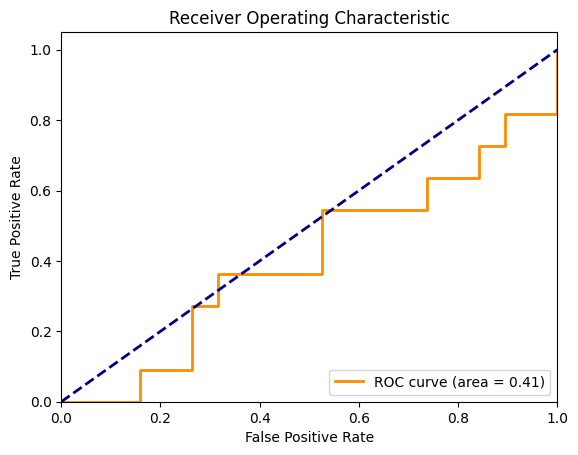

Accuracy: 0.5333333333333333
Confusion Matrix:
[[12  7]
 [ 7  4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.63      0.63        19
           1       0.36      0.36      0.36        11

    accuracy                           0.53        30
   macro avg       0.50      0.50      0.50        30
weighted avg       0.53      0.53      0.53        30

ROC AUC: 0.40669856459330145
Cross-Validation Scores: [0.6  0.45 0.5  0.5  0.5 ]
Mean Cross-Validation Score: 0.51


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(0)
data = pd.DataFrame({
    'feature1': np.random.normal(size=100),
    'feature2': np.random.normal(size=100),
    'target': np.random.binomial(1, 0.5, size=100)
})

# Preprocesamiento: Escalado de variables
scaler = StandardScaler()
data[['feature1', 'feature2']] = scaler.fit_transform(data[['feature1', 'feature2']])

# Separar variables independientes y dependientes
X = data[['feature1', 'feature2']]
y = data['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crear el modelo de regresión logística con regularización L2
model = LogisticRegression(penalty='l2', solver='liblinear')

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Curva ROC y AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Validación cruzada
cv_scores = cross_val_score(model, X, y, cv=5)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
print(f'ROC AUC: {roc_auc}')
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

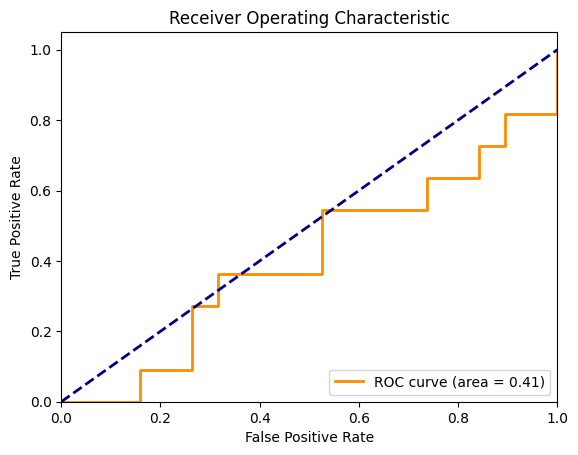

ROC AUC: 0.40669856459330145


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(0)
data = pd.DataFrame({
    'feature1': np.random.normal(size=100),
    'feature2': np.random.normal(size=100),
    'target': np.random.binomial(1, 0.5, size=100)
})

# Separar variables independientes y dependientes
X = data[['feature1', 'feature2']]
y = data['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crear el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones de probabilidades
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Imprimir el AUC
print(f'ROC AUC: {roc_auc}')

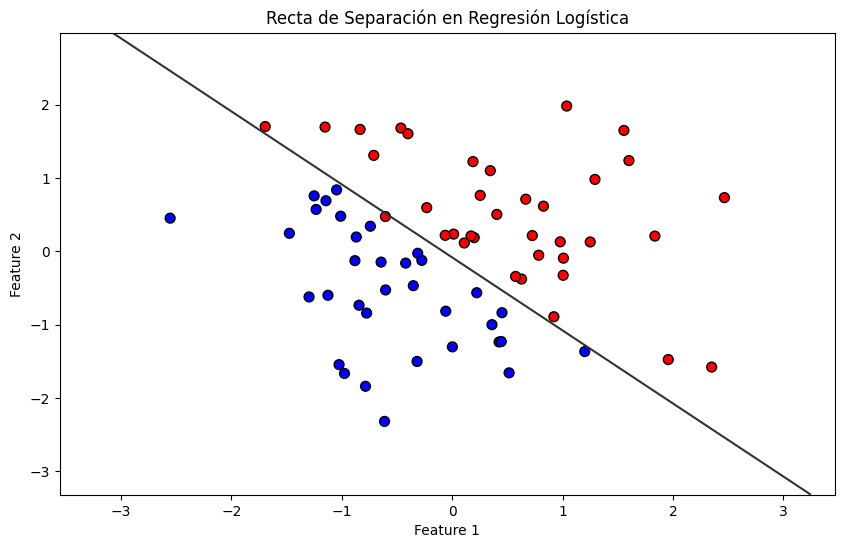

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Generar datos de ejemplo
np.random.seed(0)
n_samples = 100
X = np.random.randn(n_samples, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # La clase depende de la suma de las dos características

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Coeficientes de la recta de separación
coef = model.coef_[0]
intercept = model.intercept_

# Crear un grid de valores para graficar la frontera de decisión
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 200),
                     np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

# Graficar los datos y la recta de separación
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolor='k', s=50)
plt.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)

plt.title('Recta de Separación en Regresión Logística')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()